Dans ce fichier, l'objectif est de faire l'histogramme des erreurs de reconstruction et l'UMAP de l'espace latent pour le sillon central droit des sujets des bases de données UKB et HCP après avoir implémenter un beta-VAE

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

In [32]:
np.__file__

'/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/numpy/__init__.py'

In [33]:
#Chargement des fichiers 

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Reconstruction_error.csv")

$\textbf{ Histogramme des erreurs de reconstruction}$

In [34]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]

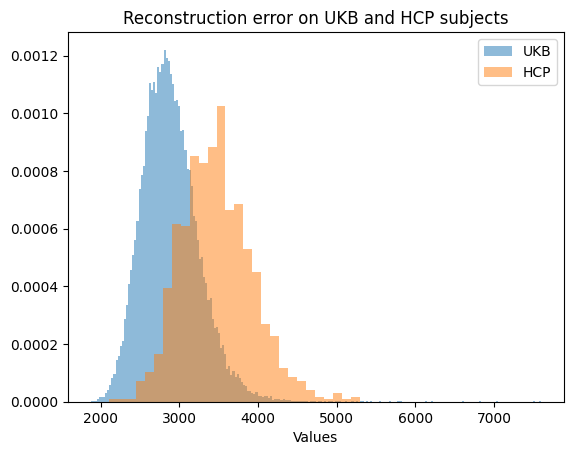

In [36]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB and HCP subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [24]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]

X= np.concatenate((X1,X2), axis=0)

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


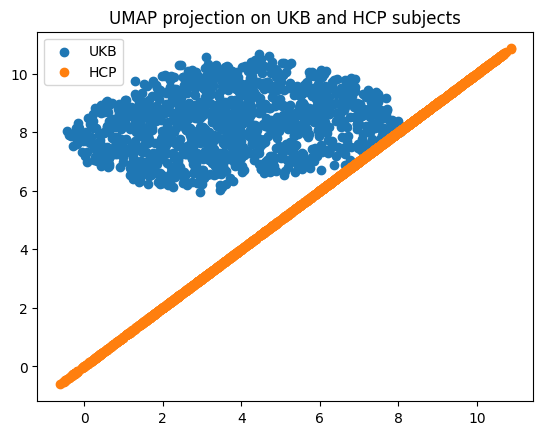

In [37]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)



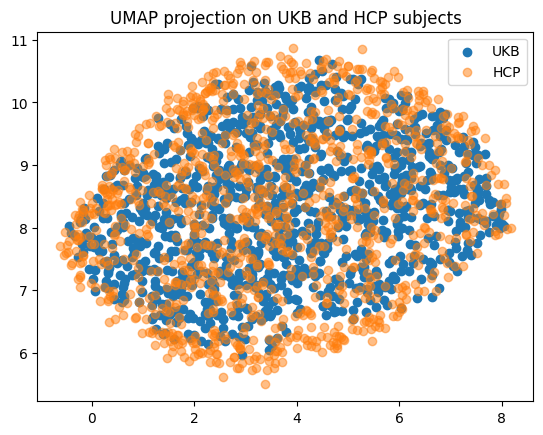

In [39]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB")
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.title("UMAP projection on UKB and HCP subjects")
plt.legend()
plt.show()

UKB has too many subjects. We choose 1000 of them randomly in order to simplify the previous plot

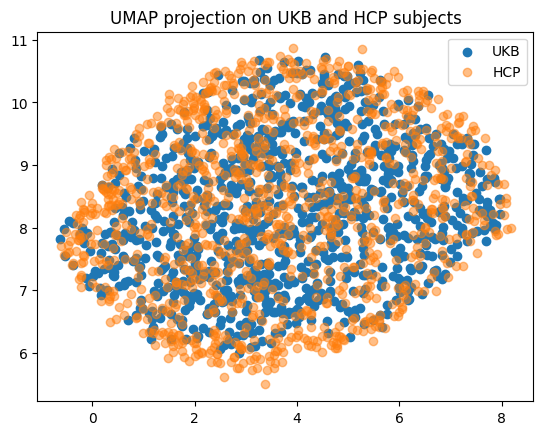

In [41]:

index= np.random.choice(X1.shape[0],size=1000, replace=False) #To choose 1000 indexes randomly

plt.scatter(X1_umap[index,0], X1_umap[index,1], label="UKB")
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.title("UMAP projection on UKB and HCP subjects")
plt.legend()
plt.show()


In [42]:
import numpy as np

a=np.load("/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE./mask/Lskeleton.npy")
a.shape
a

array([[[[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         ...,

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]],


        [[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],

         ...,

     

In [43]:
len(a)

1114